In [144]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [137]:
# Avoid OOM errors by limiting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [138]:
# remove unqualified images from dataset
data_dir = 'data'
image_exts = ['jpg', 'jpeg', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # if image is corrupted, remove it
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # if image extension is not in image_exts, remove it
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print(e)
            os.remove(image_path)
        if img is None:
            os.remove(image_path)


In [139]:
# load data
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 277 files belonging to 2 classes.


In [140]:
# Preprocess data

# scale images to [0, 1], smaller is better for training
scaled_data = data.map(lambda x,y: (x/255 # x is the image
                             , y) # y is the label
                             ) # map is a lot faster than for loop
scaled_iterator = scaled_data.as_numpy_iterator()

In [141]:
batch = scaled_iterator.next()
print(batch[0].max(), batch[0].min())

1.0 0.0


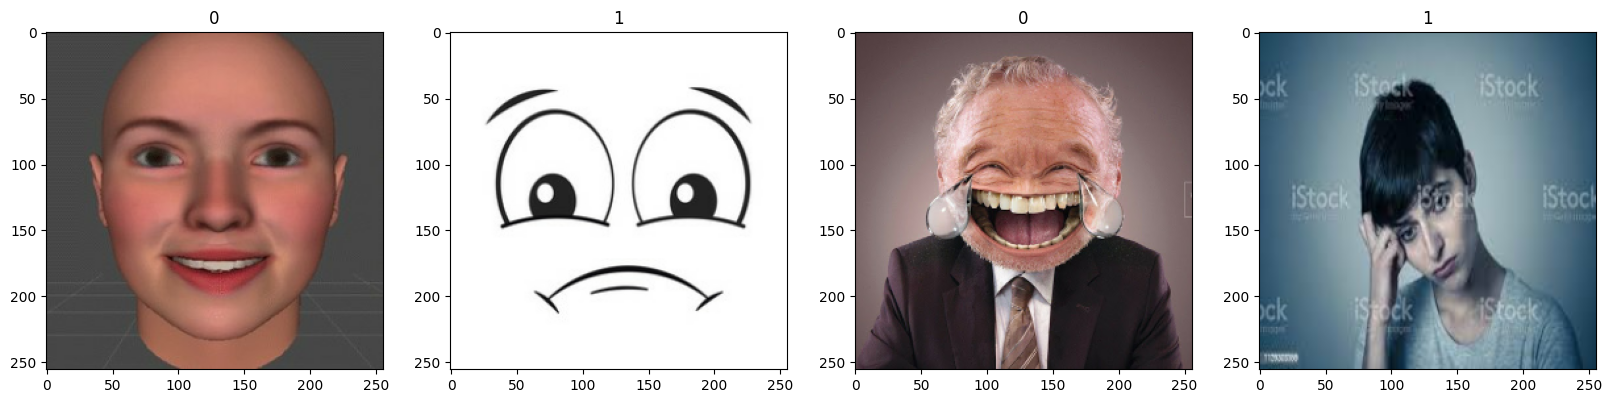

In [142]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(batch[0][:4]):
    ax[idx].imshow(image)
    ax[idx].set_title(batch[1][idx])

In [143]:
# Split Data
train_size = int(0.7 * len(scaled_data))
val_size = int(0.3 * len(scaled_data))
test_size = int(0.2 * len(scaled_data))
print(len(scaled_data), train_size, val_size, test_size, train_size + val_size + test_size)

train_data = scaled_data.take(train_size)
val_data = scaled_data.skip(train_size).take(val_size)
test_data = scaled_data.skip(train_size + val_size).take(test_size)

9 6 2 1 9


In [ ]:
# Deep Learning Model